In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Swimmer-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(1250, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(1255, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,25-07-2023 16:11:22,200,0,196,0.009941,1,201,False,-15.527233,-15.527233,-15.527233,-15.527233,-15.527233,COMPER
1,1,2,Swimmer-v4,25-07-2023 16:16:35,400,0,382,0.019882,1,401,False,19.979750,2.226259,2.226259,2.226259,2.226259,COMPER
2,1,3,Swimmer-v4,25-07-2023 16:21:46,600,0,499,0.029822,1,601,False,20.000463,8.150993,8.150993,8.150993,8.150993,COMPER
3,1,4,Swimmer-v4,25-07-2023 16:26:45,800,0,555,0.039763,1,801,False,18.988127,10.860277,10.860277,10.860277,10.860277,COMPER
4,1,5,Swimmer-v4,25-07-2023 16:31:42,1000,0,596,0.049704,1,1001,True,17.913481,12.270918,12.270918,12.270918,12.270918,COMPER
5,1,6,Swimmer-v4,25-07-2023 16:36:40,1200,0,776,0.059645,2,201,False,-3.294223,9.676728,9.676728,9.676728,9.676728,COMPER
6,1,7,Swimmer-v4,25-07-2023 16:41:43,1400,0,969,0.069586,2,401,False,5.840930,9.128756,9.128756,9.128756,9.128756,COMPER
7,1,8,Swimmer-v4,25-07-2023 16:46:48,1600,0,1169,0.079526,2,601,False,5.896588,8.724735,8.724735,8.724735,8.724735,COMPER
8,1,9,Swimmer-v4,25-07-2023 16:51:50,1800,0,1369,0.089467,2,801,False,23.716639,10.390502,10.390502,10.390502,10.390502,COMPER
9,1,10,Swimmer-v4,25-07-2023 16:56:56,2000,0,1569,0.099408,2,1001,True,35.900004,12.941453,12.941453,12.941453,12.941453,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,17-07-2023 21:21:21,200,200,0,0.009941,1,201,False,25.174118,25.174118,25.174118,25.174118,25.174118,DDPG
1,1,2,Swimmer-v4,17-07-2023 21:21:40,400,277,0,0.019882,1,401,False,26.075698,25.624908,25.624908,25.624908,25.624908,DDPG
2,1,3,Swimmer-v4,17-07-2023 21:21:58,600,306,0,0.029822,1,601,False,24.393589,25.214469,25.214469,25.214469,25.214469,DDPG
3,1,4,Swimmer-v4,17-07-2023 21:22:17,800,324,0,0.039763,1,801,False,22.733547,24.594238,24.594238,24.594238,24.594238,DDPG
4,1,5,Swimmer-v4,17-07-2023 21:22:35,1000,348,0,0.049704,1,1001,True,21.281906,23.931772,23.931772,23.931772,23.931772,DDPG
5,1,6,Swimmer-v4,17-07-2023 21:22:53,1200,512,0,0.059645,2,201,False,25.415514,24.179062,24.179062,24.179062,24.179062,DDPG
6,1,7,Swimmer-v4,17-07-2023 21:23:11,1400,632,0,0.069586,2,401,False,25.939207,24.430512,24.430512,24.430512,24.430512,DDPG
7,1,8,Swimmer-v4,17-07-2023 21:23:29,1600,729,0,0.079526,2,601,False,25.691860,24.588180,24.588180,24.588180,24.588180,DDPG
8,1,9,Swimmer-v4,17-07-2023 21:23:47,1800,812,0,0.089467,2,801,False,25.303343,24.667643,24.667643,24.667643,24.667643,DDPG
9,1,10,Swimmer-v4,17-07-2023 21:24:05,2000,897,0,0.099408,2,1001,True,24.887074,24.689586,24.689586,24.689586,24.689586,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,25-07-2023 16:11:22,200,0,196,0.009941,1,201,False,-15.527233,-15.527233,-15.527233,-15.527233,-15.527233,COMPER
1,1,2,Swimmer-v4,25-07-2023 16:16:35,400,0,382,0.019882,1,401,False,19.979750,2.226259,2.226259,2.226259,2.226259,COMPER
2,1,3,Swimmer-v4,25-07-2023 16:21:46,600,0,499,0.029822,1,601,False,20.000463,8.150993,8.150993,8.150993,8.150993,COMPER
3,1,4,Swimmer-v4,25-07-2023 16:26:45,800,0,555,0.039763,1,801,False,18.988127,10.860277,10.860277,10.860277,10.860277,COMPER
4,1,5,Swimmer-v4,25-07-2023 16:31:42,1000,0,596,0.049704,1,1001,True,17.913481,12.270918,12.270918,12.270918,12.270918,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
246,5,247,Swimmer-v4,18-07-2023 04:22:46,49400,43316,0,0.999,50,401,False,41.337507,23.405848,27.567944,29.172530,35.111848,DDPG
247,5,248,Swimmer-v4,18-07-2023 04:23:09,49600,43516,0,0.999,50,601,False,36.689040,23.459409,27.511930,29.821344,35.270301,DDPG
248,5,249,Swimmer-v4,18-07-2023 04:23:32,49800,43716,0,0.999,50,801,False,41.776398,23.532972,27.533534,30.529962,35.984719,DDPG
249,5,250,Swimmer-v4,18-07-2023 04:23:55,50000,43916,0,0.999,50,1001,True,38.644921,23.593419,27.456147,31.104637,36.210562,DDPG
250,5,251,Swimmer-v4,18-07-2023 04:23:55,50001,43917,0,0.999,51,2,True,0.014941,23.499481,27.109564,30.696999,32.994419,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

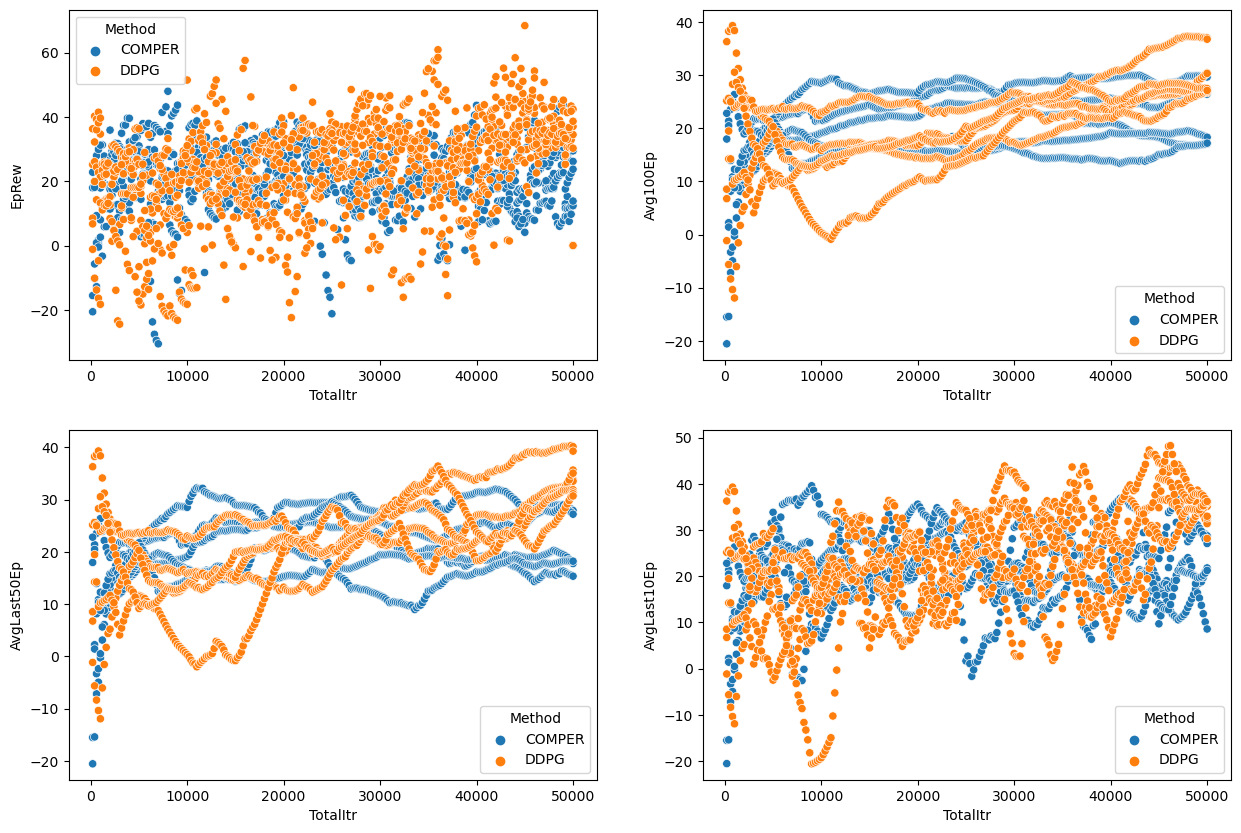

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

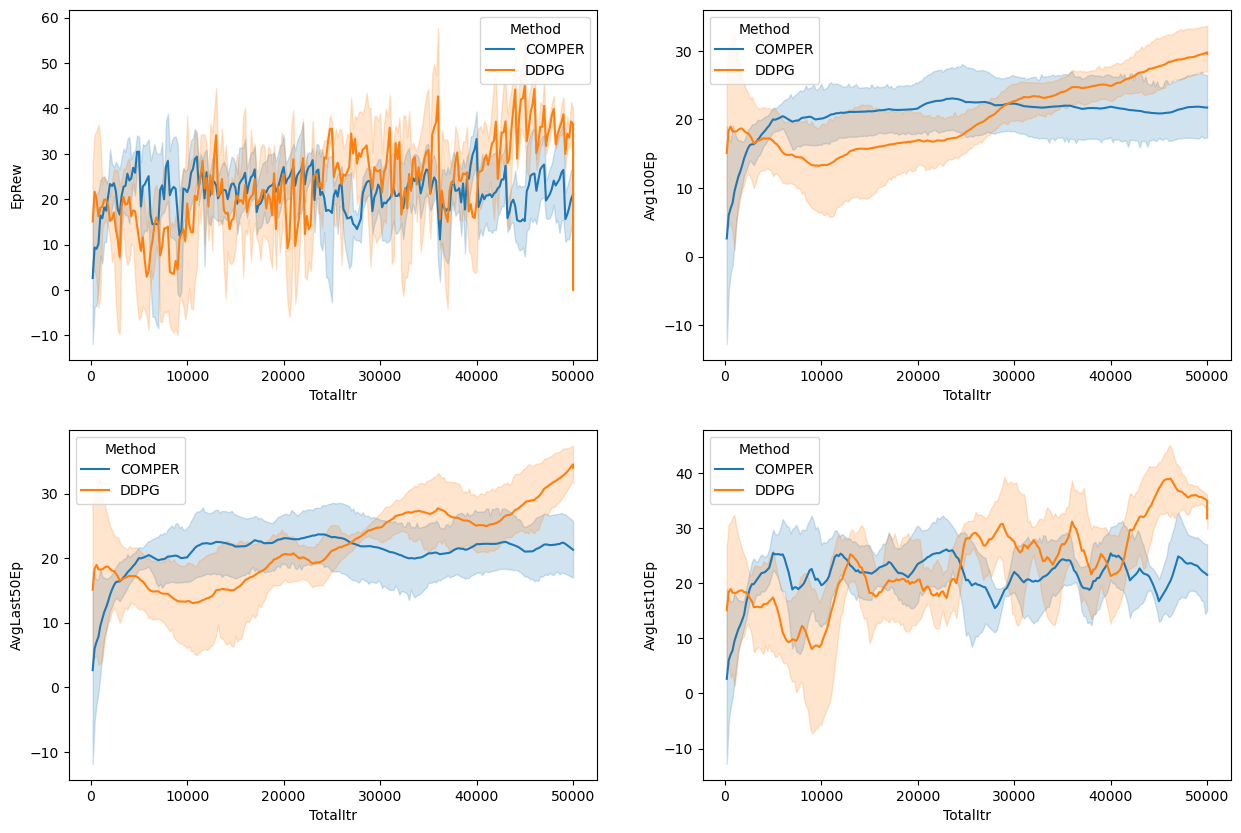

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [12]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,25-07-2023 18:15:02,Swimmer-v4,5000,1.404653,COMPER
1,1,25-07-2023 20:25:27,Swimmer-v4,10000,1.725064,COMPER
2,1,25-07-2023 22:37:07,Swimmer-v4,15000,1.612634,COMPER
3,1,26-07-2023 00:48:35,Swimmer-v4,20000,1.450122,COMPER
4,1,26-07-2023 03:00:36,Swimmer-v4,25000,2.345842,COMPER


In [13]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,1.305531
std,1.428571,14507.211437,0.542602
min,1.000000,5000.000000,-0.025434
25%,2.000000,15000.000000,0.991402
50%,3.000000,27500.000000,1.404387
75%,4.000000,40000.000000,1.631798
max,5.000000,50000.000000,2.345842


In [14]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,17-07-2023 21:28:35,Swimmer-v4,5000,1.570438,DDPG
1,1,17-07-2023 21:36:17,Swimmer-v4,10000,-0.617055,DDPG
2,1,17-07-2023 21:44:09,Swimmer-v4,15000,0.659451,DDPG
3,1,17-07-2023 21:52:06,Swimmer-v4,20000,1.466822,DDPG
4,1,17-07-2023 22:00:22,Swimmer-v4,25000,1.283119,DDPG


In [15]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,0.877826
std,1.428571,14507.211437,0.890019
min,1.000000,5000.000000,-0.822081
25%,2.000000,15000.000000,0.354994
50%,3.000000,27500.000000,1.004301
75%,4.000000,40000.000000,1.364901
max,5.000000,50000.000000,2.834939


In [16]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

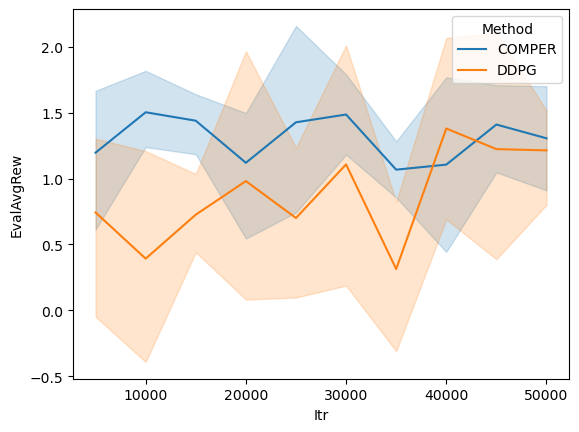

In [17]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')